In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load_datasets
path = str(os.getcwd()) + "\\" + "Datasets"
Trees = np.load(os.path.join(path ,"Minecraft_Trees.npy"))
# Test_Trees = np.load(os.path.join(path ,"Unseen_Trees.npy"))

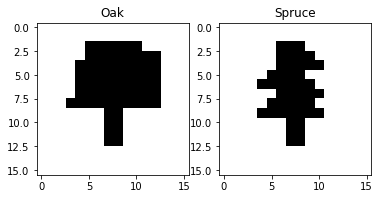

In [3]:
#img_plot
fig, ax = plt.subplots(1,2)

ax[0].set_title("Oak")
ax[0].imshow(Trees[4], cmap = "gray", interpolation = "nearest")
ax[1].set_title("Spruce")
ax[1].imshow(Trees[104], cmap = "gray", interpolation = "nearest")

plt.show()

In [4]:
#set_label
label = []

for index, data in enumerate(Trees):
    if (index <= 100):
        label.append([1, 0])
    else:
        label.append([0, 1])
        
label = np.array(label)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#define_features & targets
X = Trees.copy().reshape(200,16,16,1)
y = label.copy()

In [7]:
#split_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [9]:
class MyModel:
    
    def __init__(self, X_train, X_test, y_train, y_test):
        
        self.X_train = X_train
        self.X_test = X_test 
        self.y_train = y_train
        self.y_test = y_test
        
        self.CNN_model = Sequential()
        
        self.CNN_model.add(Conv2D(64, (3,3), input_shape=(16,16,1)))
        self.CNN_model.add(Activation("relu"))
        self.CNN_model.add(MaxPooling2D(pool_size=(2,2)))
        
        self.CNN_model.add(Conv2D(64, (3,3)))
        self.CNN_model.add(Activation("relu"))
        self.CNN_model.add(MaxPooling2D(pool_size=(2,2)))
        
        self.CNN_model.add(Flatten())
        self.CNN_model.add(Dense(64))
        
        self.CNN_model.add(Dense(2))
        self.CNN_model.add(Activation("softmax"))
        
        self.CNN_model.compile(loss=categorical_crossentropy, optimizer=Adam(),
        metrics=["accuracy"])
        
    def getFit(self):
        return self.CNN_model.fit(X_train, y_train, batch_size=20, epochs=5)
    
    def getEvaluate(self):
        return self.CNN_model.evaluate(self.X_test, self.y_test)

In [10]:
CNN_model = MyModel(X_train, X_test, y_train, y_test)

In [11]:
CNN_model.getFit()

Epoch 1/5
9/9 [==============================] - 0s 5ms/step - loss: 24.5124 - accuracy: 0.5215
Epoch 2/5
9/9 [==============================] - 0s 5ms/step - loss: 0.4683 - accuracy: 0.9897
Epoch 3/5
9/9 [==============================] - 0s 5ms/step - loss: 0.8822 - accuracy: 0.9860
Epoch 4/5
9/9 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.9917
Epoch 5/5
9/9 [==============================] - 0s 5ms/step - loss: 0.1464 - accuracy: 0.9967


In [12]:
CNN_model.getEvaluate()

1/1 [==============================] - 0s 152ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]